# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
from citipy import citipy
from api_keys import weather_api_key
from pprint import pprint

In [2]:
lat_range = (-90, 90)
long_range = (-180, 180)

lat_long = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_long = zip(lats, long)

for lat_long in lat_long:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
City = []
Lat = []
Long = []              
Max_temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []

city_number = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "units=Metric"

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
 #for i, city in enumerate(test):
for city in cities:           
    query = f"{url}q={city}&{units}&appid={weather_api_key}"
    response = requests.get(query).json()
   
    try:     
        this = response["name"]
        City.append(this)
    
        lati = response["coord"]["lat"]
        Lat.append(lati)
    
        longi = response["coord"]["lon"]
        Long.append(longi)
    
        temp = response['main']['temp_max']
        Max_temp.append(temp)
    
        hum = response['main']['humidity']
        Humidity.append(hum)
        
        cloud = response["clouds"]["all"]
        Cloudiness.append(cloud)
    
        wind = response["wind"]["speed"]
        Wind_Speed.append(wind)
        
        print(city_number, response["name"])
        
        city_number = city_number + 1
    
    except KeyError:
        pass


0 Maan
1 Buraidah
2 Hithadhoo
3 Adra
4 Jamestown
5 Airai
6 Busselton
7 Esperance
8 Vila Velha
9 East London
10 Zaraza
11 Kutum
12 Saint-Philippe
13 Saldanha
14 Mataura
15 Rikitea
16 Manokwari
17 Maniitsoq
18 Valparaíso
19 Mar del Plata
20 Mahébourg
21 Cidreira


KeyboardInterrupt: 

In [9]:
print(len(City),
len(Lat),
len(Long),              
len(Max_temp),
len(Humidity),
len(Cloudiness),
len(Wind_Speed))

22 22 22 22 22 22 22


In [10]:
main_df = pd.DataFrame({"City": City,
              "Lat": Lat,
              "Long": Long,
              "Max Temp": Max_temp,
              "Humidity": Humidity,
              "Cloudiness": Cloudiness,
              "Wind Speed": Wind_Speed})
main_df

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,Maan,5.93,124.74,26.27,69,100,1.54
1,Buraidah,26.33,43.98,26.00,29,0,2.10
2,Hithadhoo,-0.60,73.08,28.37,74,66,4.72
3,Adra,36.75,-3.02,22.00,73,34,2.60
4,Jamestown,42.10,-79.24,15.56,71,75,2.60
5,Airai,-8.93,125.41,14.88,75,100,1.38
6,Busselton,-33.65,115.33,12.22,89,86,3.51
7,Esperance,-33.87,121.90,13.00,100,90,3.60
8,Vila Velha,-20.33,-40.29,27.78,78,5,4.60
9,East London,-33.02,27.91,15.72,64,100,1.08


## Generate Cities List

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Creates variables for relevant table columns
latitude = main_df["Lat"]
temperature = main_df["Max Temp"]
humidity = main_df["Humidity"]
cloudiness = main_df["Cloudiness"]
wind_speed = main_df["Wind Speed"]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

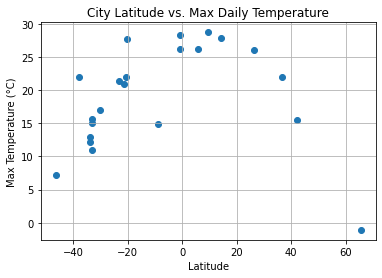

In [14]:
plt.scatter(latitude, temperature)
plt.title("City Latitude vs. Max Daily Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.savefig("lat_vs_temp.png")

## Latitude vs. Humidity Plot

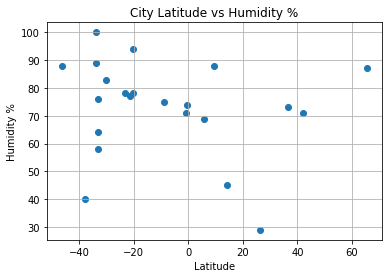

In [15]:
plt.scatter(latitude, humidity)
plt.title("City Latitude vs Humidity %")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.savefig("lat_vs_hum.png")

## Latitude vs. Cloudiness Plot

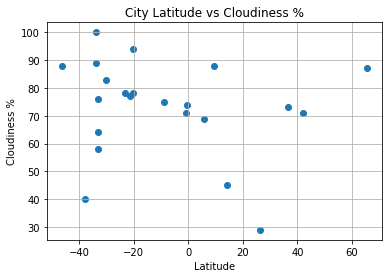

In [16]:
plt.scatter(latitude, humidity)
plt.title("City Latitude vs Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.savefig("lat_vs_cloud.png")

## Latitude vs. Wind Speed Plot

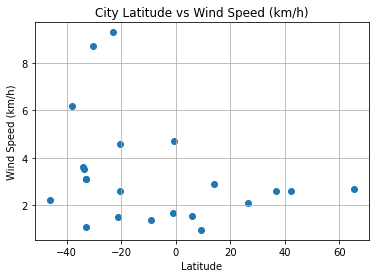

In [17]:
plt.scatter(latitude, wind_speed)
plt.title("City Latitude vs Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")
plt.grid(True)
plt.savefig("lat_vs_wind.png")

## Linear Regression

In [31]:
north_df = main_df.loc[main_df["Lat"] > 0]
south_df = main_df.loc[main_df["Lat"] < 0]

north_lat = north_df["Lat"]
south_lat = south_df["Lat"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Max Temp"])
linear_reg = vc_slope * north_lat + vc_int
#linear_reg

0     31.291054
1     21.804754
3     16.959302
4     14.471473
10    29.700704
11    27.445382
17     3.627331
Name: Lat, dtype: float64

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [32]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Max Temp"])
linear_reg1 = vc_slope * south_lat + vc_int
#linear_reg1

2     26.740384
5     23.876037
6     15.375838
7     15.300189
8     19.956042
9     15.592469
12    19.601867
13    15.595908
14    11.063843
15    18.996675
16    26.647542
18    15.585592
19    13.880050
20    19.928534
21    16.569029
Name: Lat, dtype: float64

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [33]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Humidity"])
linear_reg2 = vc_slope * north_lat + vc_int
#linear_reg2

0     59.353123
1     65.338959
3     68.396430
4     69.966245
10    60.356631
11    61.779734
17    76.808877
Name: Lat, dtype: float64

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Humidity"])
linear_reg3 = vc_slope * south_lat + vc_int
#linear_reg3

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [34]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Cloudiness"])
linear_reg4 = vc_slope * north_lat + vc_int
#linear_reg4

0     84.567551
1     61.671377
3     49.976371
4     43.971737
10    80.729075
11    75.285622
17    17.798267
Name: Lat, dtype: float64

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Cloudiness"])
linear_reg5 = vc_slope * south_lat + vc_int
#linear_reg5

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [35]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(north_lat, north_df["Wind Speed"])
linear_reg6 = vc_slope * north_lat + vc_int
#linear_reg6

0     1.732338
1     2.148344
3     2.360834
4     2.469933
10    1.802081
11    1.900984
17    2.945485
Name: Lat, dtype: float64

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [36]:
(vc_slope, vc_int, vc_r, vc_p, vc_std_err) = stats.linregress(south_lat, south_df["Wind Speed"])
linear_reg7 = vc_slope * south_lat + vc_int
#linear_reg7

2     3.286753
5     3.467791
6     4.005036
7     4.009818
8     3.715550
9     3.991345
12    3.737935
13    3.991127
14    4.277571
15    3.776186
16    3.292621
18    3.991779
19    4.099576
20    3.717289
21    3.929622
Name: Lat, dtype: float64